In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

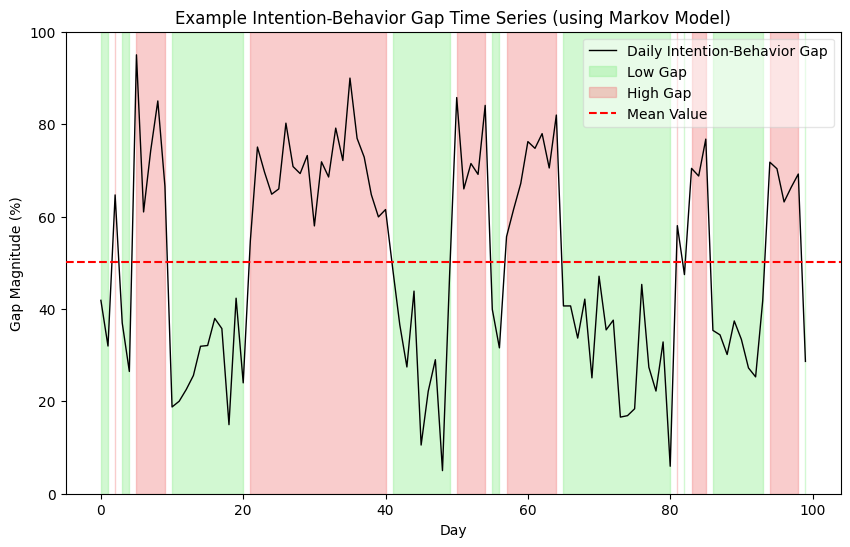

In [2]:
# Set the random seed
np.random.seed(2024)

# Define transition probability
p_transition = 0.2

# Set the number of steps
steps = 100

# Initialize Markov model
states = np.zeros(steps)
states[0] = 1 if np.random.rand() < 0.5 else -1  # Initial state for reduced steps

# Generate the Markov model states with reduced steps
for i in range(1, steps):
    if np.random.rand() < p_transition:
        states[i] = -states[i-1]  # Switch state
    else:
        states[i] = states[i-1]


# Add increased noise to the reduced steps model
states_noisy = (states + np.random.normal(0, 0.5, steps))  # Add noise, scaled to 0.5
# Map to 0 - 100
states_noisy = states_noisy + abs(states_noisy.min()) # first make all values positive
state_range = states_noisy.max()
multiplier = 90/states_noisy.max()
states_noisy = states_noisy * multiplier + 5 # the 5 is to center it in the range (5 - 95)

# Calculate the mean value of the noisy states
mean_value = np.mean(states_noisy)

# Adjusting the plot to ensure full range coloring and that the plotted line is not cut off
plt.figure(figsize=(10, 6))

# Find the absolute maximum value in the noisy states to set as y-axis limits, ensuring the plotted line is not cut off
abs_max_value = max(abs(states_noisy.min()), abs(states_noisy.max())) + .25

# Plot the Markov model with increased noise in black, ensuring it's fully visible
plt.plot(states_noisy, label='Daily Intention-Behavior Gap', color='black', linewidth=1, zorder=2)

# Background coloring extending across the full Y-axis range
plt.fill_between(range(steps), 0, 100, where=states_noisy <= mean_value, color='lightgreen', alpha=0.4, label='Low Gap', zorder=1)
plt.fill_between(range(steps), 0, 100, where=states_noisy > mean_value, color='lightcoral', alpha=0.4, label='High Gap', zorder=1)

# Ensure the y-axis is symmetric around 0 to accommodate the full height of the rectangles
plt.ylim(0, 100)

# Add the mean value line in red
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean Value', zorder=3)

plt.title('Example Intention-Behavior Gap Time Series (using Markov Model)')
plt.xlabel('Day')
plt.ylabel('Gap Magnitude (%)')
plt.legend(facecolor='white', framealpha=0.5)
plt.show()

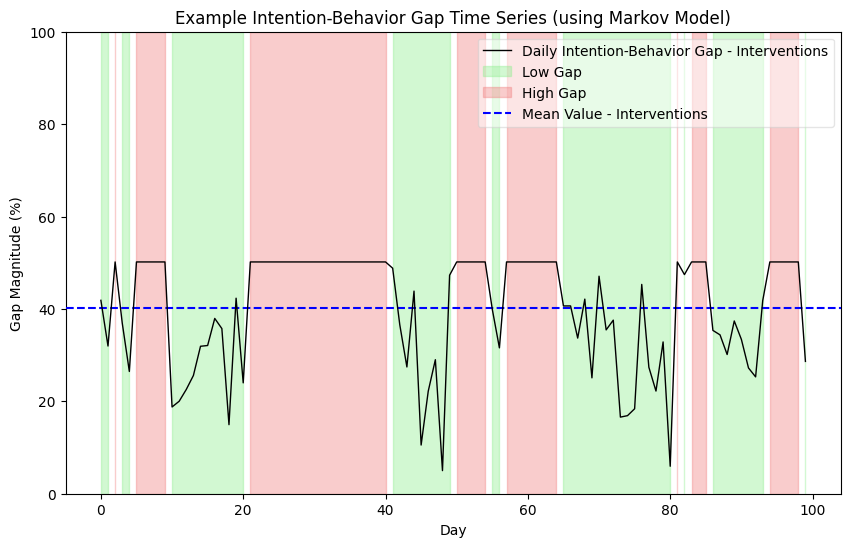

In [13]:
# Set the random seed
np.random.seed(2024)

# Define transition probability
p_transition = 0.2

# Set the number of steps
steps = 100

# Initialize Markov model
states = np.zeros(steps)
states[0] = 1 if np.random.rand() < 0.5 else -1  # Initial state for reduced steps

# Generate the Markov model states with reduced steps
for i in range(1, steps):
    if np.random.rand() < p_transition:
        states[i] = -states[i-1]  # Switch state
    else:
        states[i] = states[i-1]


# Add increased noise to the reduced steps model
states_noisy = (states + np.random.normal(0, 0.5, steps))  # Add noise, scaled to 0.5
# Map to 0 - 100
states_noisy = states_noisy + abs(states_noisy.min()) # first make all values positive
state_range = states_noisy.max()
multiplier = 90/states_noisy.max()
states_noisy = states_noisy * multiplier + 5 # the 5 is to center it in the range (5 - 95)

# Calculate the mean value of the noisy states
mean_value = np.mean(states_noisy)

# eliminate high gap states
states_noisy_intervention = np.clip(states_noisy, None, mean_value)

# Calculate the mean with no high-gap states
mean_value_intervention = np.mean(states_noisy_intervention)

# Adjusting the plot to ensure full range coloring and that the plotted line is not cut off
plt.figure(figsize=(10, 6))

# Find the absolute maximum value in the noisy states to set as y-axis limits, ensuring the plotted line is not cut off
abs_max_value = max(abs(states_noisy.min()), abs(states_noisy.max())) + .25

# Plot the Markov model with increased noise in black, ensuring it's fully visible
# plt.plot(states_noisy, label='Daily Intention-Behavior Gap', color='black', linewidth=1, linestyle='--', zorder=2)
# Plot the Markov model with increased noise in black, ensuring it's fully visible
plt.plot(states_noisy_intervention, label='Daily Intention-Behavior Gap - Interventions', color='black', linewidth=1, zorder=4)

# Background coloring extending across the full Y-axis range
plt.fill_between(range(steps), 0, 100, where=states_noisy <= mean_value, color='lightgreen', alpha=0.4, label='Low Gap', zorder=1)
plt.fill_between(range(steps), 0, 100, where=states_noisy > mean_value, color='lightcoral', alpha=0.4, label='High Gap', zorder=1)

# Ensure the y-axis is symmetric around 0 to accommodate the full height of the rectangles
plt.ylim(0, 100)

# Add the mean value line in red
# plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean Value', zorder=3)
plt.axhline(y=mean_value_intervention, color='blue', linestyle='--', label='Mean Value - Interventions', zorder=3)

plt.title('Example Intention-Behavior Gap Time Series (using Markov Model)')
plt.xlabel('Day')
plt.ylabel('Gap Magnitude (%)')
plt.legend(facecolor='white', framealpha=0.5)
plt.show()